<a href="https://colab.research.google.com/github/junhojjangjjangman/DNN/blob/main/AI%EB%AA%A8%EB%8D%B8%EB%A7%81_02_%EA%B3%A0%EA%B0%9D%EC%9D%B4%ED%83%88%EC%98%88%EC%B8%A1_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [실습] Python을 활용한 AI 모델링 - 딥러닝 파트


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 학습목차
1. 딥러닝 심층신경망(DNN) 모델 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - DNN 딥러닝 모델
2. 재현율 성능이 좋지 않다. 어떻게 성능향상 할수 있나?

#  
# 1. 딥러닝 심층신경망(DNN) 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

##### <font color=blue> **[문제] 같은 폴더내에 있는 data_2022.csv 파일을 Pandas read_csv 함수를 이용하여 읽어 df 변수에 저장하세요.** </font>

In [ ]:
# 구글 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# 읽어 들일 파일명 : data_2022.csv
# Pandas read_csv 함수 활용
# 결과 : df 저장
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/data_2022.csv")
df.head()

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,No,34,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
1,Male,No,No,2,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
2,Male,No,No,45,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
3,Female,No,No,2,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
4,Female,No,No,8,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


## ③ 데이터 분석

In [ ]:
# 17컬럼, 7027 라인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   Partner           7027 non-null   object 
 2   Dependents        7027 non-null   object 
 3   tenure            7027 non-null   int64  
 4   MultipleLines     7027 non-null   object 
 5   InternetService   7027 non-null   object 
 6   OnlineSecurity    7027 non-null   object 
 7   OnlineBackup      7027 non-null   object 
 8   TechSupport       7027 non-null   object 
 9   StreamingTV       7027 non-null   object 
 10  StreamingMovies   7027 non-null   object 
 11  Contract          7027 non-null   object 
 12  PaperlessBilling  7027 non-null   object 
 13  PaymentMethod     7027 non-null   object 
 14  MonthlyCharges    7027 non-null   float64
 15  TotalCharges      7027 non-null   float64
 16  Churn             7027 non-null   int64  


In [ ]:
df.tail()

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7022,Female,No,No,72,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7023,Male,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7024,Female,Yes,Yes,72,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7025,Female,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7026,Male,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


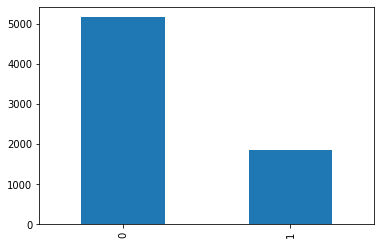

In [ ]:
# Churn 레이블 불균형 
df['Churn'].value_counts().plot(kind='bar')

## ④ 데이터 전처리

+ 모든 데이터값들은 숫자형으로 되어야 한다. 즉, Ojbect 타입을 모든 숫자형 변경 필요
+ Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding

In [ ]:
# Object 컬럼명 수집

cal_cols = df.select_dtypes('object').columns.values
cal_cols

array(['gender', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], dtype=object)

##### <font color=blue> **[문제] Object 컬럼에 대해 One-Hot-Encoding 수행하고 그 결과를 df1 변수에 저장하세요.** </font>

In [ ]:
# Pandas get_dummies() 함수 이용
# 원-핫-인코딩 결과를 df1 저장

df1 = pd.get_dummies(data=df, columns=cal_cols)


In [ ]:
# 19컬럼, 7814 라인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7027 non-null   int64  
 1   MonthlyCharges                           7027 non-null   float64
 2   TotalCharges                             7027 non-null   float64
 3   Churn                                    7027 non-null   int64  
 4   gender_Female                            7027 non-null   uint8  
 5   gender_Male                              7027 non-null   uint8  
 6   Partner_No                               7027 non-null   uint8  
 7   Partner_Yes                              7027 non-null   uint8  
 8   Dependents_No                            7027 non-null   uint8  
 9   Dependents_Yes                           7027 non-null   uint8  
 10  MultipleLines_No                         7027 no

## ⑤ Train, Test  데이터셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df1.drop('Churn', axis=1).values
y = df1['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape

((4918, 39), (2109, 39))

In [ ]:
y_train.shape

(4918,)

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [ ]:
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7022,72,21.15,1419.40,0,1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
7023,24,84.80,1990.50,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7024,72,103.20,7362.90,0,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7025,11,29.60,346.45,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7026,4,74.40,306.60,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:2]

array([[0.65277778, 0.56851021, 0.40877722, 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.27777778, 0.00498256, 0.04008671, 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1. 

## ⑦ 딥러닝 심층신경망(DNN) 모델 구현

####  
### 라이브러리 임포트

In [ ]:
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(100)

####  
### 하이퍼파라미터 설정 : batch_size, epochs

In [ ]:
batch_size = 16
epochs = 20

####  
### 모델 입력(features) 갯수 확인

In [ ]:
X_train.shape

(4918, 39)

####  
### 모델 출력(label) 갯수 확인

In [ ]:
y_train.shape

(4918,)

####  
### A. 이진분류 DNN모델 구성 

![hidden Layer](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer1.PNG)
+ [출처] https://subscription.packtpub.com/book/data/9781788995207/1/ch01lvl1sec03/deep-learning-intuition

##### <font color=blue> **[문제] 요구사항대로 Sequential 모델을 만들어 보세요.** </font>

In [ ]:
# Sequential() 모델 정의 하고 model로 저장
# input layer는 input_shape=() 옵션을 사용한다.
# 39개 input layer
# unit 4개 hidden layer
# unit 3개 hidden layer 
# 1개 output layser : 이진분류
model_dnn = tf.keras.Sequential([
    tf.keras.layers.Dense(4,  activation='relu', input_shape=(39,)),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1,   activation='sigmoid')
    ])

####  
### 모델 확인

In [ ]:
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 160       
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 구성 -  과적합 방지

![dropout](https://github.com/gzone2000/TEMP_TEST/raw/master/dropout.PNG)
+ [출처] https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [ ]:
# 모델에 Dropout 적용하기
drop_prob1, drop_prob2 = 0.3, 0.2
model_dnn = tf.keras.Sequential([
    tf.keras.layers.Dense(4,  activation='relu', input_shape=(39,)),
    tf.keras.layers.Dropout(drop_prob1),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dropout(drop_prob2),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

## tf.keras.layers.BatchNormalization()

```
tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    **kwargs
)
```

####  
### 과적합 방지 모델 확인

In [ ]:
model_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 160       
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 3)                 15        
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 컴파일 – 이진 분류 모델

##### <font color=blue> **[문제] 요구사항대로 모델을 comfile 하세요.** </font>

In [ ]:
# optimizer 는 'adam' , loss 는 이진분류에 사용하는것, merics는 'accuracy' 지정합니다.
model_dnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

- 모델 컴파일 – 다중 분류 모델 (Y값을 One-Hot-Encoding 한경우) <br>
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 다중 분류 모델  (Y값을 One-Hot-Encoding 하지 않은 경우) <br>
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

####  
### 모델 학습

##### <font color=blue> **[문제] 요구사항대로 DNN 모델을 학습시키세요.** </font>
+ 모델 이름 : model
+ epoch : 10번
+ batch_size : 10번

In [ ]:
# 앞쪽에서 정의된 모델 이름 : model
# Sequential 모델의 fit() 함수 사용
# @인자
### X, y : X_train, y_train
### validation_data=(X_test, y_test)
### epochs 10번
### batch_size 16
history = model_dnn.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=10,
                        batch_size=16)

Epoch 1/10
308/308 [==============================] - 4s 4ms/step - loss: 0.6272 - accuracy: 0.7318 - val_loss: 0.5539 - val_accuracy: 0.7345
Epoch 2/10
308/308 [==============================] - 1s 4ms/step - loss: 0.5716 - accuracy: 0.7363 - val_loss: 0.5067 - val_accuracy: 0.7345
Epoch 3/10
308/308 [==============================] - 1s 4ms/step - loss: 0.5467 - accuracy: 0.7552 - val_loss: 0.4891 - val_accuracy: 0.7345
Epoch 4/10
308/308 [==============================] - 1s 4ms/step - loss: 0.5313 - accuracy: 0.7574 - val_loss: 0.4793 - val_accuracy: 0.7345
Epoch 5/10
308/308 [==============================] - 1s 4ms/step - loss: 0.5257 - accuracy: 0.7566 - val_loss: 0.4770 - val_accuracy: 0.7345
Epoch 6/10
308/308 [==============================] - 1s 4ms/step - loss: 0.5197 - accuracy: 0.7554 - val_loss: 0.4739 - val_accuracy: 0.7345
Epoch 7/10
308/308 [==============================] - 1s 4ms/step - loss: 0.5218 - accuracy: 0.7538 - val_loss: 0.4721 - val_accuracy: 0.7345
Epoch 

####  
### B. 다중 분류 DNN 구성
+ 13개 input layer
+ unit 5개 hidden layer
+ dropout
+ unit 4개 hidden layer 
+ dropout
+ 2개 output layser : 다중분류

![다중분류](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer2.PNG)
+ [출처] https://www.educba.com/dnn-neural-network/

In [ ]:
# 39개 input layer
# unit 5개 hidden layer
# dropout
# unit 4개 hidden layer 
# dropout
# 2개 output layser : 다중분류, activation- softmax
drop_prob1, drop_prob2 = 0.3, 0.2
model_dnn2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,  activation='relu', input_shape=(39,)),
    tf.keras.layers.Dropout(drop_prob1),
    #tf.keras.layers.BatchNamlization(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dropout(drop_prob2),
    tf.keras.layers.Dense(2, activation='softmax')
    ])

####  
### 모델 확인

In [ ]:
model_dnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 200       
                                                                 
 dropout_3 (Dropout)         (None, 5)                 0         
                                                                 
 dense_9 (Dense)             (None, 4)                 24        
                                                                 
 dropout_4 (Dropout)         (None, 4)                 0         
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 컴파일 – 다중 분류 모델

In [ ]:
y_train.shape

(4918,)

In [ ]:
model_dnn2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

####  
### 모델 학습

In [ ]:
history2 = model_dnn2.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=16)

Epoch 1/20
308/308 [==============================] - 2s 7ms/step - loss: 0.4583 - accuracy: 0.7806 - val_loss: 0.4267 - val_accuracy: 0.7994
Epoch 2/20
308/308 [==============================] - 2s 7ms/step - loss: 0.4629 - accuracy: 0.7810 - val_loss: 0.4254 - val_accuracy: 0.8028
Epoch 3/20
308/308 [==============================] - 2s 5ms/step - loss: 0.4589 - accuracy: 0.7769 - val_loss: 0.4253 - val_accuracy: 0.7952
Epoch 4/20
308/308 [==============================] - 1s 4ms/step - loss: 0.4660 - accuracy: 0.7723 - val_loss: 0.4248 - val_accuracy: 0.8018
Epoch 5/20
308/308 [==============================] - 1s 3ms/step - loss: 0.4622 - accuracy: 0.7784 - val_loss: 0.4249 - val_accuracy: 0.8013
Epoch 6/20
308/308 [==============================] - 1s 3ms/step - loss: 0.4670 - accuracy: 0.7778 - val_loss: 0.4260 - val_accuracy: 0.8037
Epoch 7/20
308/308 [==============================] - 1s 3ms/step - loss: 0.4617 - accuracy: 0.7753 - val_loss: 0.4251 - val_accuracy: 0.7952
Epoch 

####  
### Callback : 조기종료, 모델 저장

과적합을 방지하기 위해 사용

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# val_loss 모니터링해서 성능이 5번 지나도록 좋아지지 않으면 조기 종료
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',# 모니터 기준 설정 (val loss) 
                                              mode='min',
                                              verbose=1,
                                              patience=5) # 5회 Epoch동안 개선되지 않는다면 종료

In [ ]:
# val_loss 가장 낮은 값을 가질때마다 모델저장
check_point = tf.keras.callbacks.ModelCheckpoint('best_model.h5',# file명을 지정합니다
                              verbose=1, # 로그를 출력합니다
                              monitor='val_loss',# val_loss 값이 개선되었을때 호출됩니다
                              mode='min',# auto는 알아서 best를 찾습니다. min = val_loss 가장 낮은 값을 가질때마다 모델저장/max
                              save_best_only=True)# 가장 best 값만 저장합니다

####  
### 모델 학습

In [ ]:
history = model_dnn.fit(x=X_train, y=y_train, 
          epochs=50 , batch_size=20,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop, check_point])

####  
## ⑧ 모델 성능 평가

In [ ]:
losses = pd.DataFrame(history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.517931,0.758032,0.474196,0.734471
1,0.517099,0.758438,0.471823,0.734471
2,0.511025,0.763522,0.469959,0.734945
3,0.505405,0.763318,0.462565,0.735420
4,0.512099,0.761285,0.463722,0.737316


### 성능 시각화

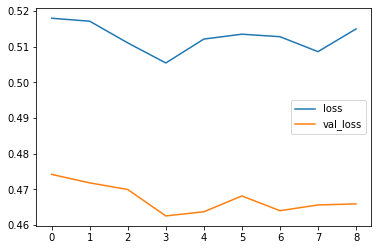

In [ ]:
losses[['loss','val_loss']].plot()

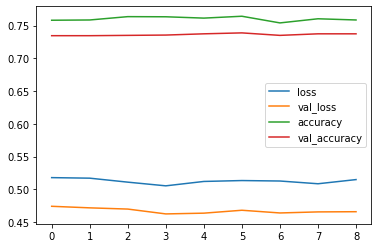

In [ ]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

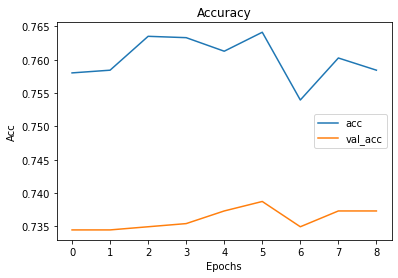

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

### 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
pred = model_dnn.predict(X_test)

66/66 [==============================] - 0s 1ms/step


In [ ]:
pred.shape

(2109, 1)

In [ ]:
y_pred = np.argmax(pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# 정확도 80%
accuracy_score(y_test, y_pred)

0.7344713134186819

In [ ]:
# 재현율 성능이 좋지 않다
recall_score(y_test, y_pred)

0.0

In [ ]:
# accuracy, recall, precision 성능 한번에 보기

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       560

    accuracy                           0.73      2109
   macro avg       0.37      0.50      0.42      2109
weighted avg       0.54      0.73      0.62      2109



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
